## 1. Import Modules, Load Data and Data Review | EDA


- **Import Pandas Library**

- **Force Pandas to display all rows and columns**

- **Let's read a CSV file using Pandas as follows**

- **Let's obtain the datatype**

- **you can view the first couple of rows using .head()**

- **Obtain a Statistical Summary about the data**

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)


In [2]:
df = pd.read_csv("Human_Resources.csv")

In [3]:
df.sample(3)
df.columns
df.describe().T

df.isnull().sum()[df.isnull().sum()>0]

MonthlyIncome        3
Department           1
EducationField       1
EmployeeNumber       1
Gender               1
JobRole              1
MaritalStatus        1
MonthlyRate          2
PercentSalaryHike    1
PerformanceRating    1
dtype: int64

In [4]:
def dataframe_summary(df, columns):  
    
    print("\n",{'-'*80},"\n")
    # Eksik değerleri göster
    print("Eksik Değerler:","\n")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values)
    
    print("\n",{'-'*80},"\n")
    
    print("Toplam Duplicated sütun sayıları :","\n")
    duplicated = df.duplicated().sum()
    print(duplicated)
    
    print("\n",{'-'*80},"\n")
    
    # Sütunların istatistiksel özetini göster
    print("Sütunların İstatistiksel Özeti:")
    print(df.describe().T)
    print("\n",{'-'*80},"\n")


    print("Sütun isimleri:")
    print(df.columns)
    print("\n",{'-'*80},"\n")    
    
    """Prints unique values and their counts for specific columns in the DataFrame."""
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*50}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
        
cat_features = df.select_dtypes(include='object').columns
    
dataframe_summary(df,cat_features)




 {'--------------------------------------------------------------------------------'} 

Eksik Değerler: 

MonthlyIncome        3
Department           1
EducationField       1
EmployeeNumber       1
Gender               1
JobRole              1
MaritalStatus        1
MonthlyRate          2
PercentSalaryHike    1
PerformanceRating    1
dtype: int64

 {'--------------------------------------------------------------------------------'} 

Toplam Duplicated sütun sayıları : 

0

 {'--------------------------------------------------------------------------------'} 

Sütunların İstatistiksel Özeti:
                               count         mean         std         min  \
Age                      1470.000000    36.923810    9.135373   18.000000   
MonthlyIncome            1467.000000  6505.155419 4711.297846 1009.000000   
DailyRate                1470.000000   802.485714  403.509100  102.000000   
DistanceFromHome         1470.000000     9.192517    8.106864    1.000000   
Education       

In [5]:
df["Department"].value_counts()

Department
Research & Development    960
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [6]:
df["Department"] = df["Department"].fillna("Research & Development")
df["Department"].isnull().sum()

0

In [7]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [8]:
df["MonthlyIncome"].value_counts()

MonthlyIncome
2342.000000     4
2451.000000     3
2610.000000     3
6142.000000     3
6347.000000     3
               ..
6322.000000     1
7104.000000     1
2773.000000     1
19513.000000    1
4404.000000     1
Name: count, Length: 1346, dtype: int64

In [9]:
df["PercentSalaryHike"]=df["PercentSalaryHike"].fillna(df["PercentSalaryHike"].mean())
df["PerformanceRating"]=df["PerformanceRating"].fillna(df["PerformanceRating"].mean())
df["MonthlyRate"]=df["MonthlyRate"].fillna(df["MonthlyRate"].mean())
df["EmployeeNumber"]=df["EmployeeNumber"].fillna(df["EmployeeNumber"].mean())
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df["EducationField"]=df["EducationField"].fillna("Other")


In [10]:
df.dropna(subset=["Gender","MaritalStatus"], inplace=True)

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [13]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

In [14]:
df["EmployeeNumber"].unique()

array([1.000e+00, 2.000e+00, 4.000e+00, ..., 2.064e+03, 2.065e+03,
       2.068e+03])

In [15]:
df["StandardHours"].unique()

array([80], dtype=int64)

In [16]:
df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18","StandardHours"], inplace=True)

In [17]:
df.sample(4)

,Age,MonthlyIncome,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
450,31,6582.000000,No,Travel_Rarely,828,Sales,2,1,Life Sciences,2,Male,77,3,2,Sales Executive,4,Single,8346.000000,4,Yes,13.000000,3.000000,3,0,10,2,4,6,5,0,5
820,35,4968.000000,No,Travel_Frequently,1182,Sales,11,2,Marketing,4,Male,54,3,2,Sales Executive,4,Divorced,18500.000000,1,No,11.000000,3.000000,4,1,5,3,3,5,2,0,2
243,40,3319.000000,No,Travel_Rarely,1300,Research & Development,24,2,Technical Degree,1,Male,62,3,2,Research Scientist,4,Divorced,24447.000000,1,No,17.000000,3.000000,1,2,9,3,3,9,8,4,7
54,26,4157.000000,No,Travel_Rarely,1443,Sales,23,3,Marketing,3,Female,47,2,2,Sales Executive,4,Married,21436.000000,7,Yes,19.000000,3.000000,3,1,5,2,2,2,2,0,0


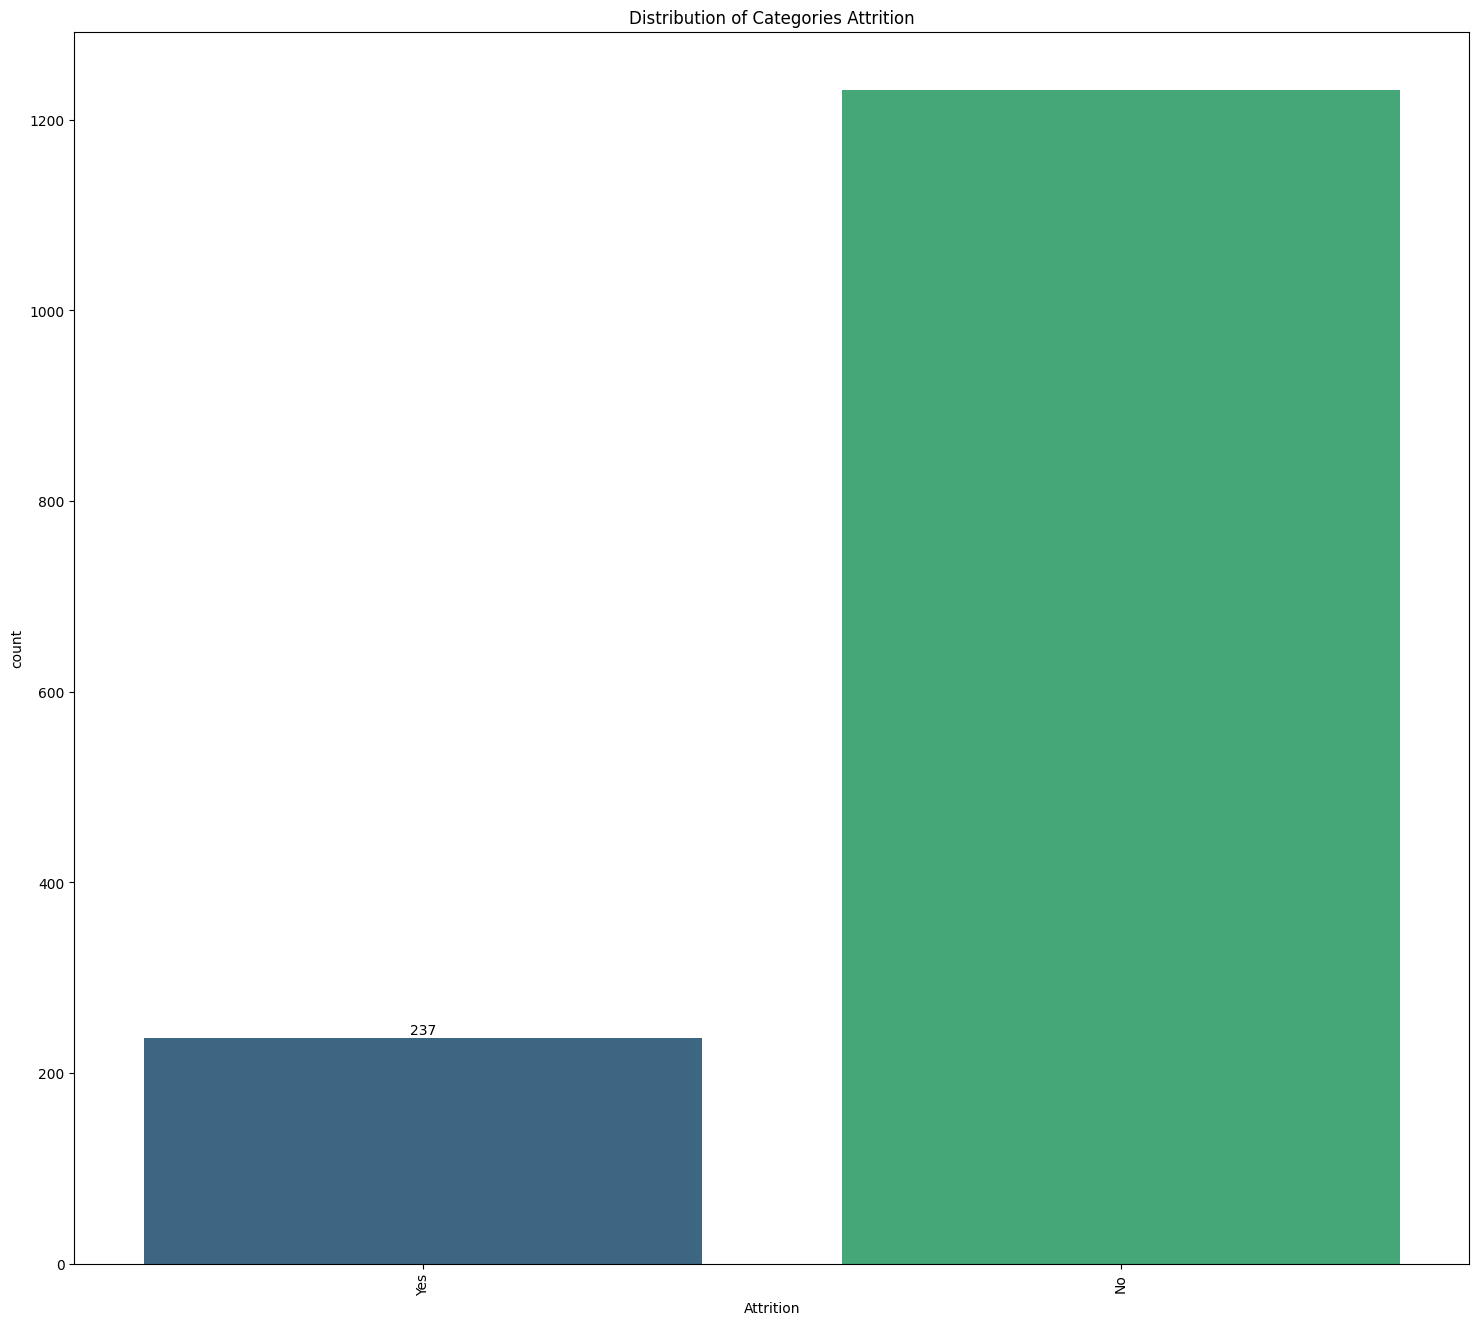

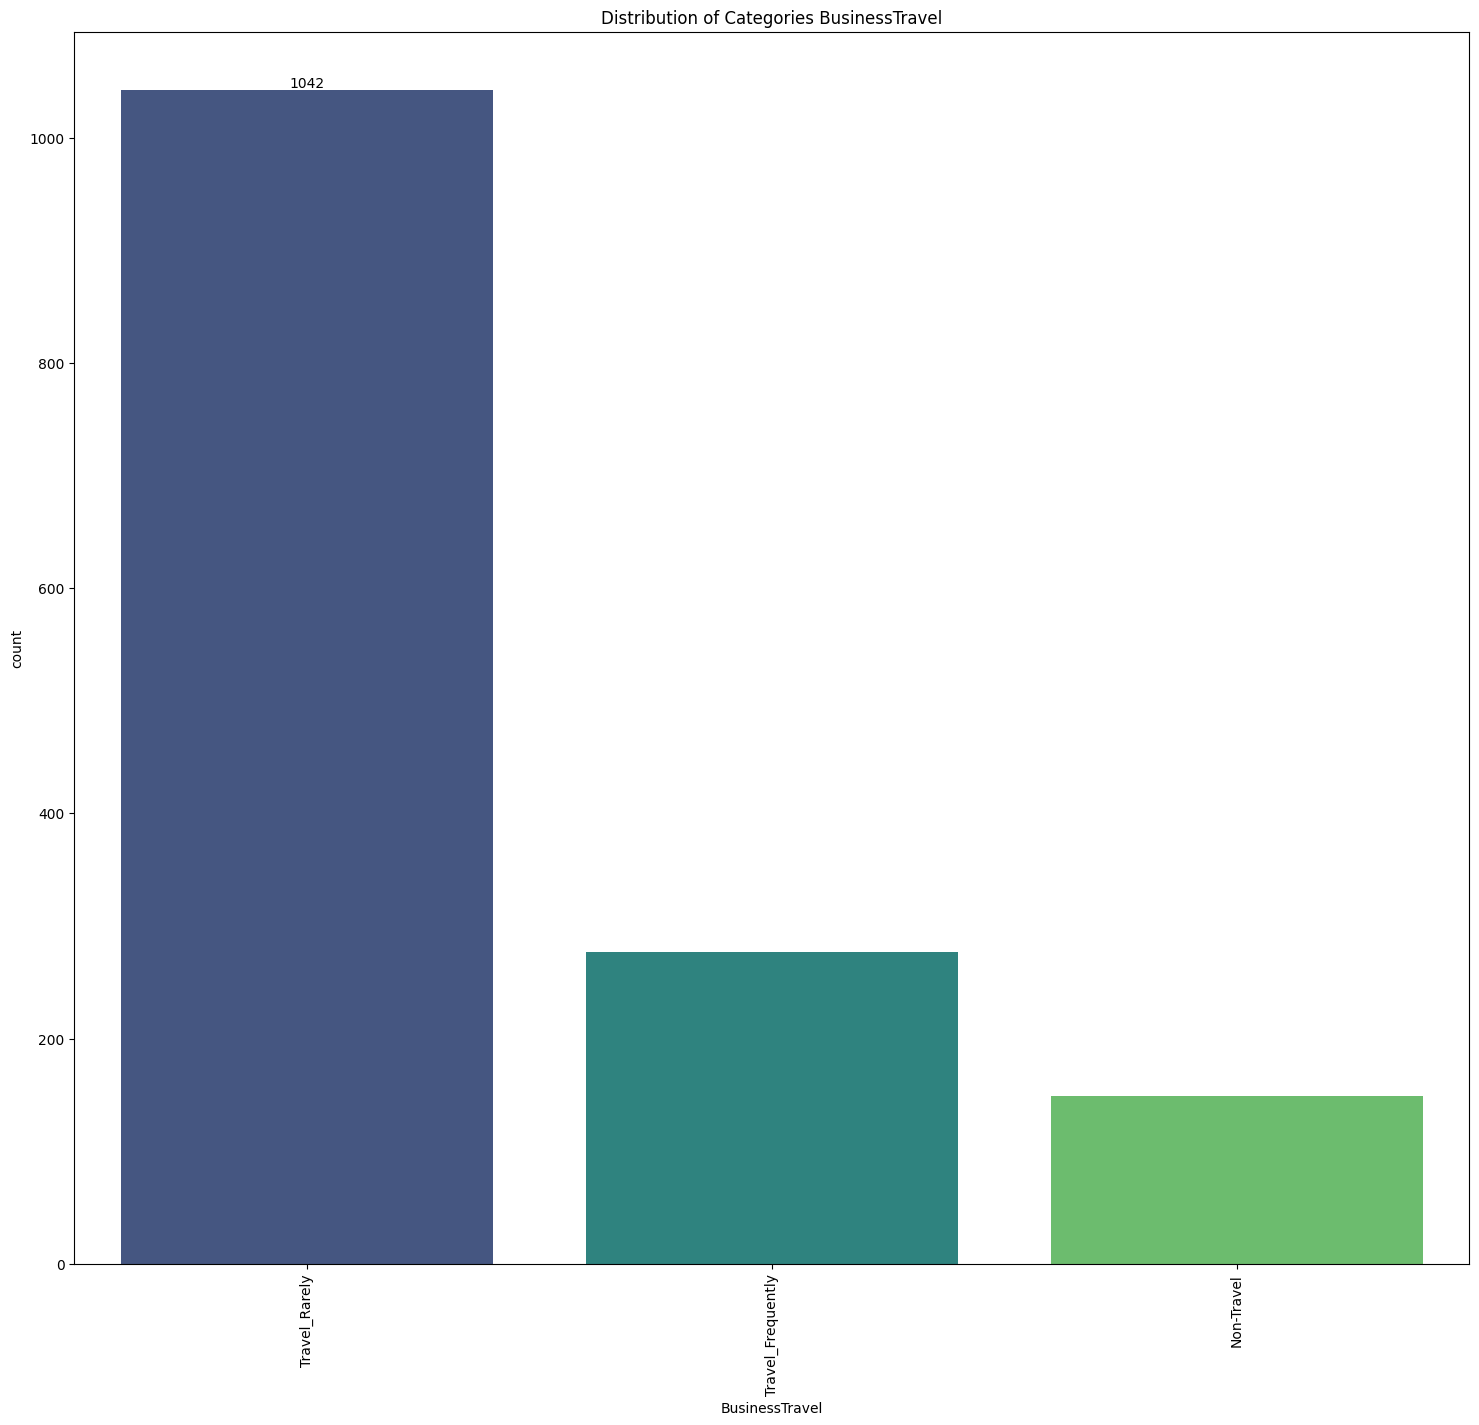

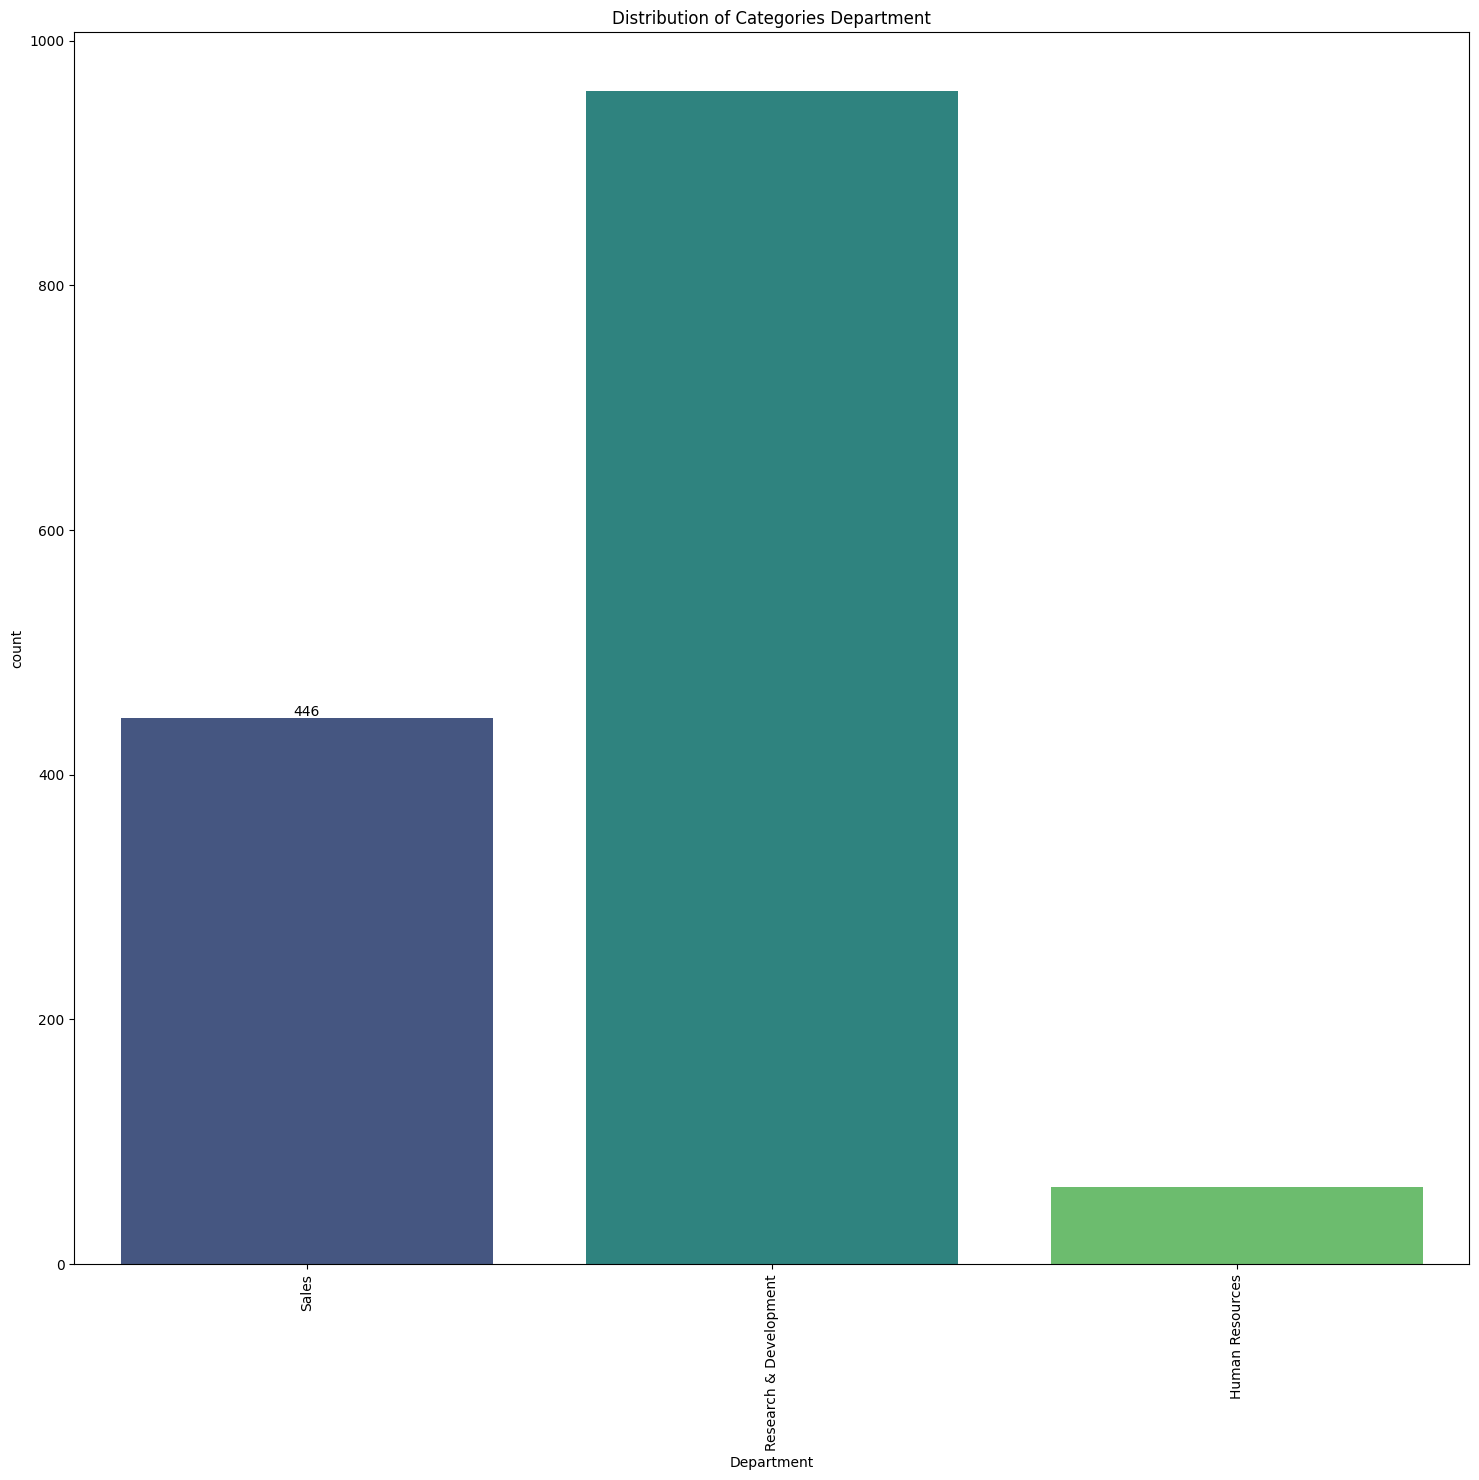

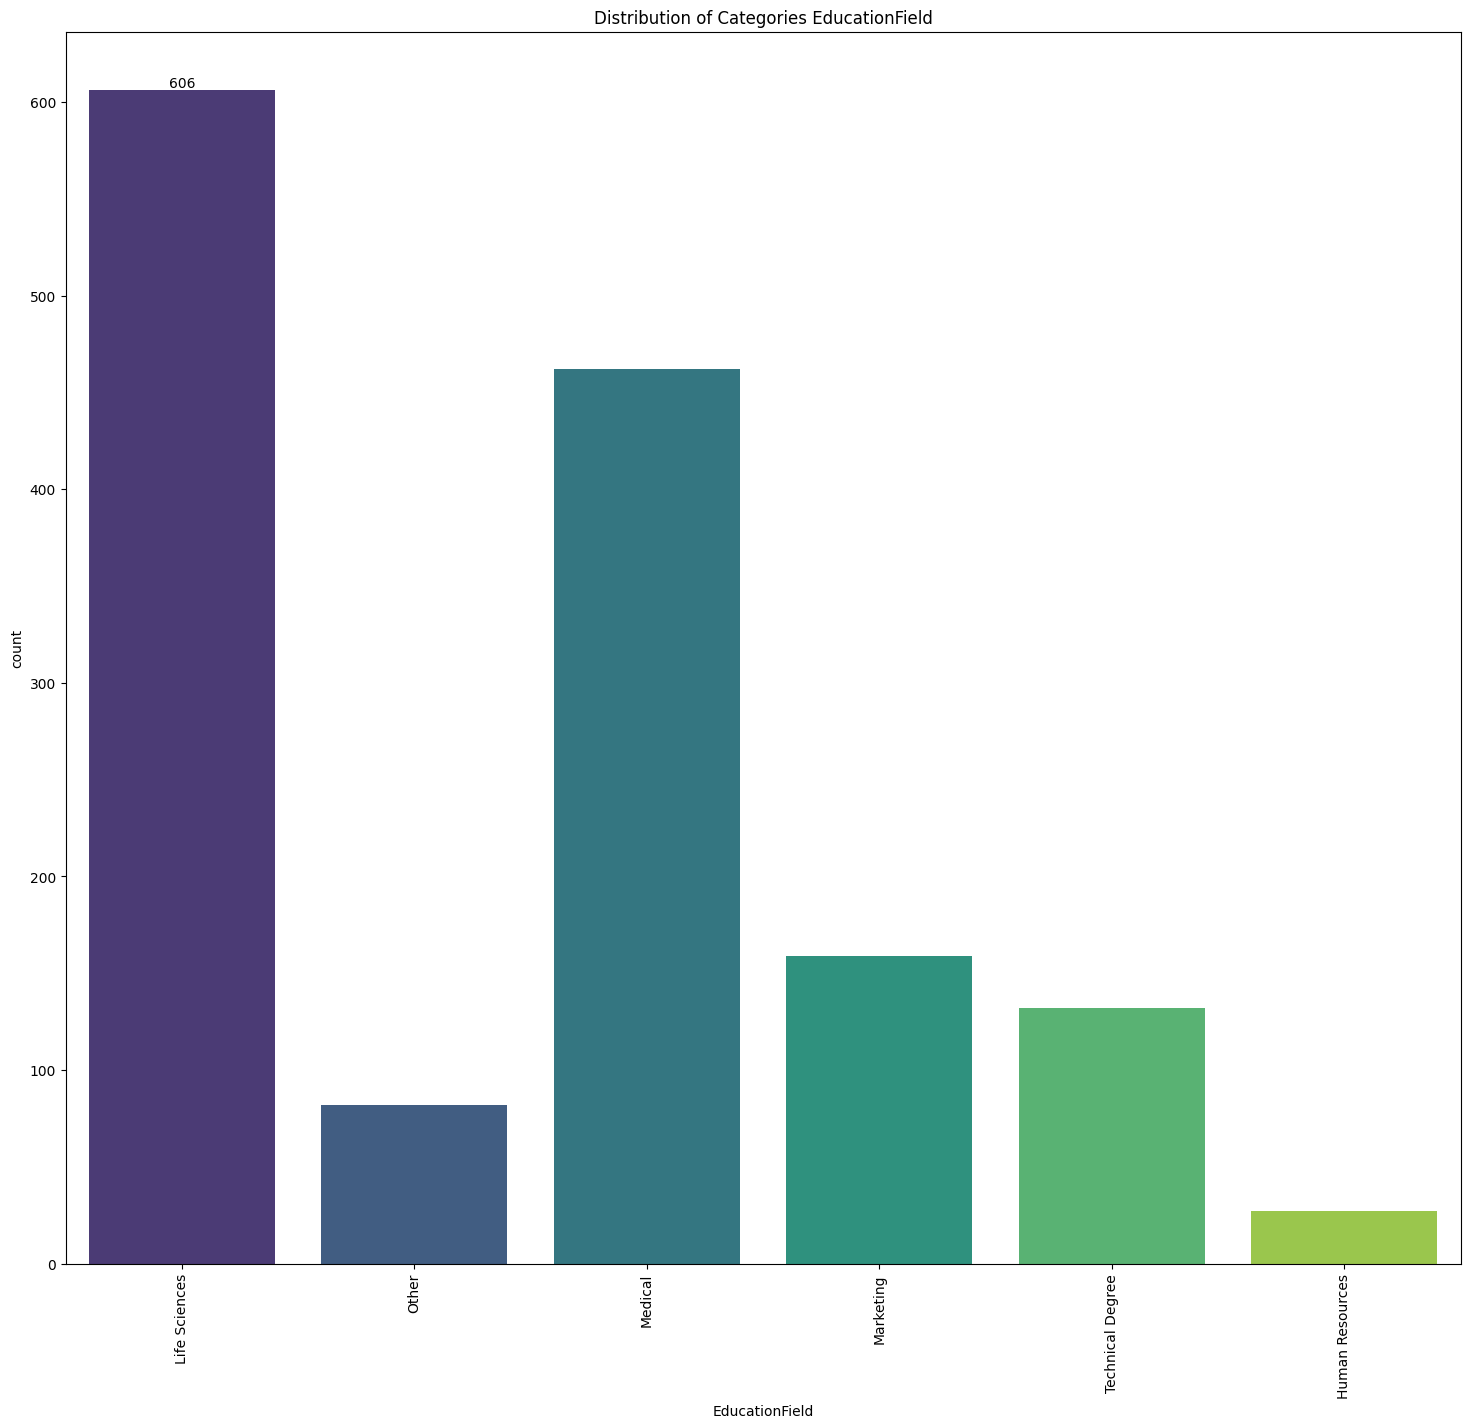

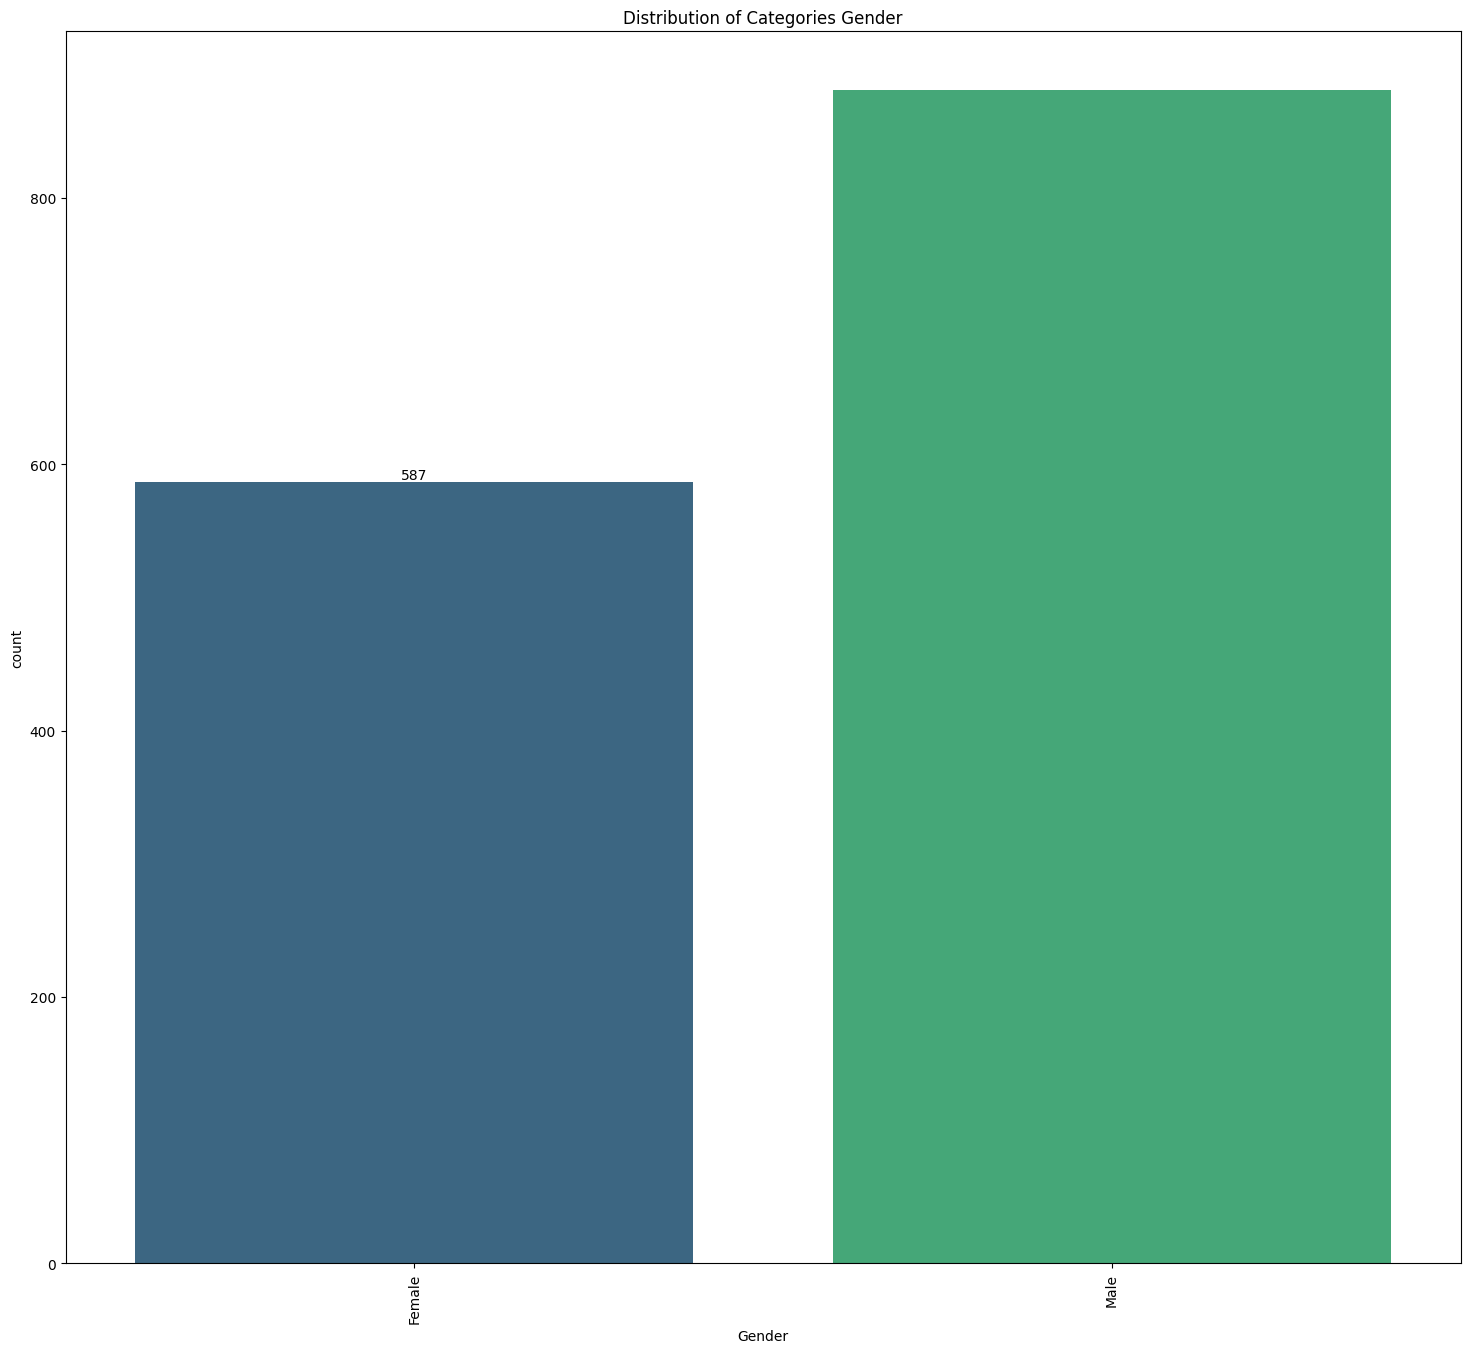

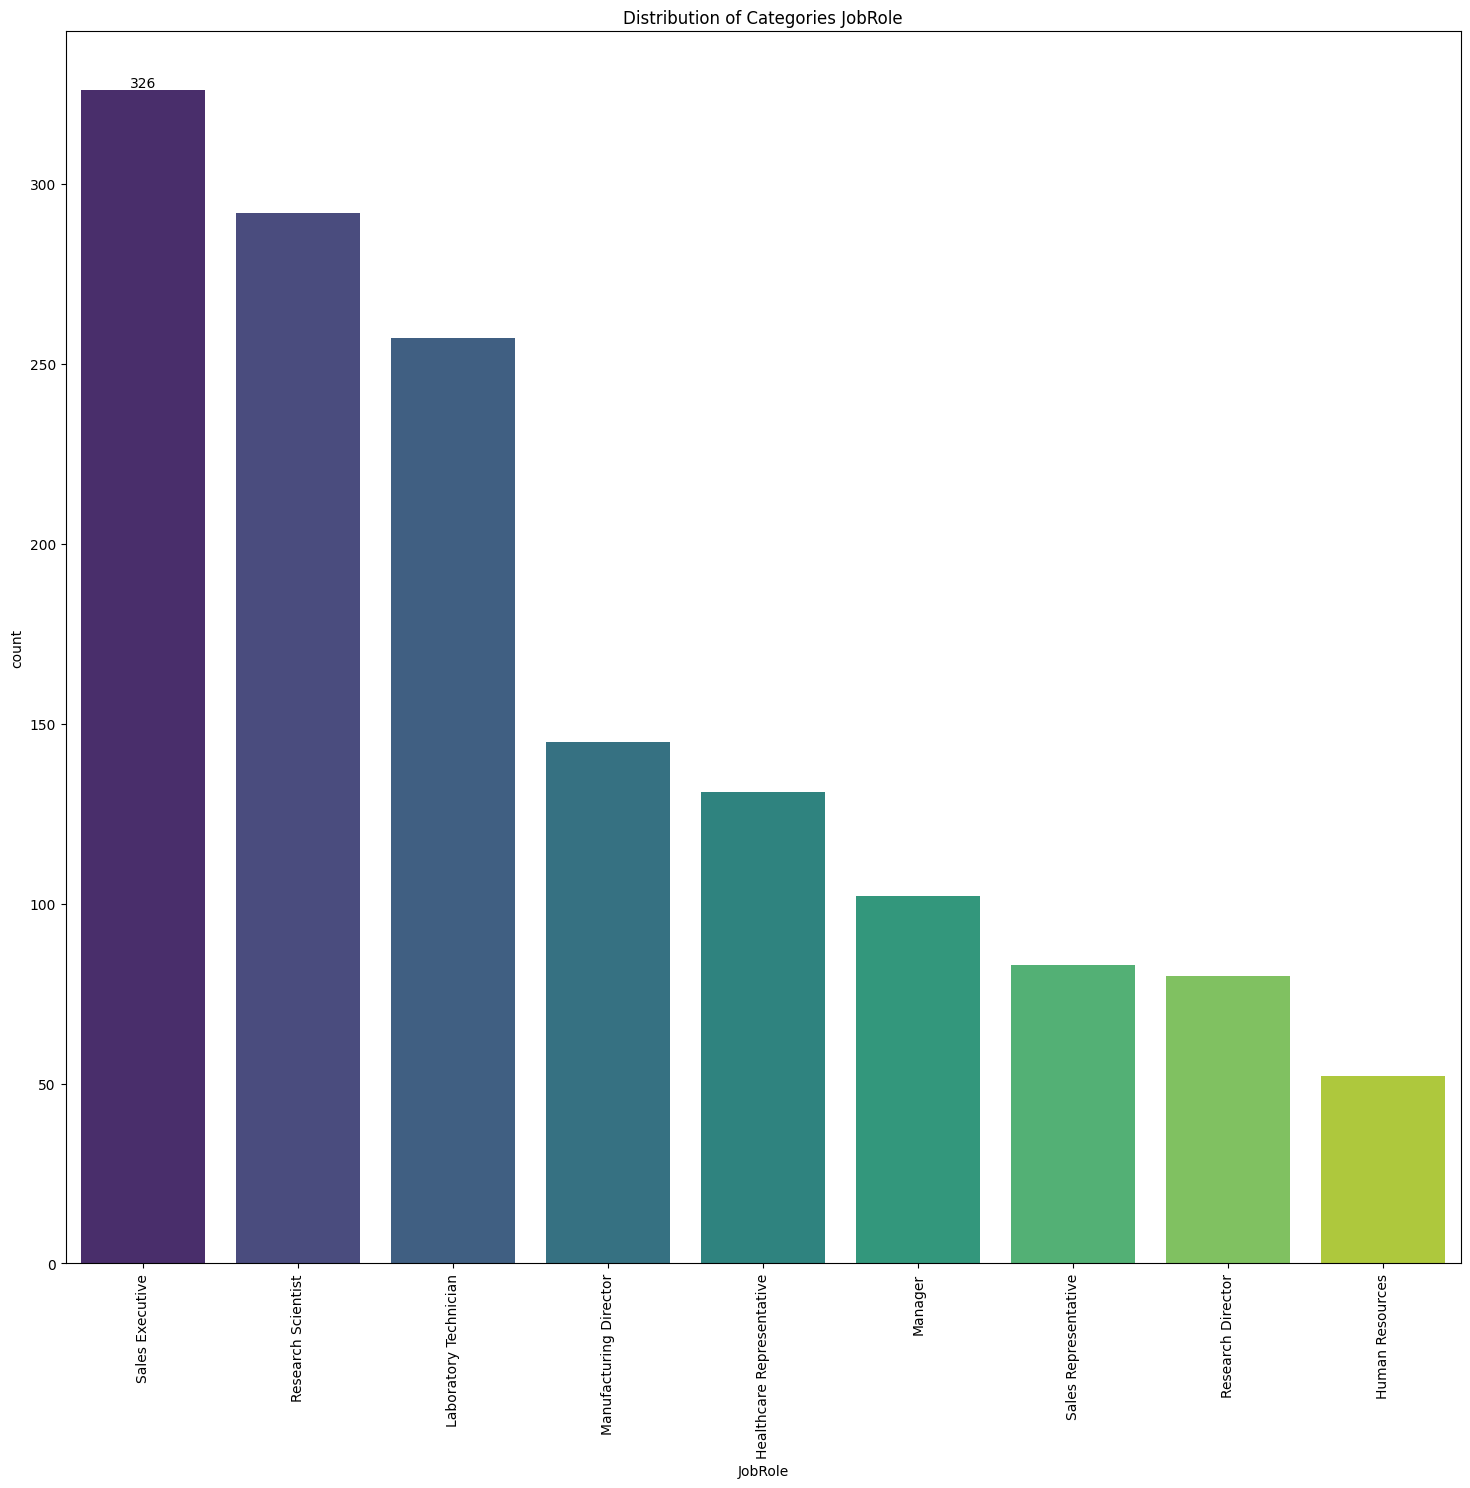

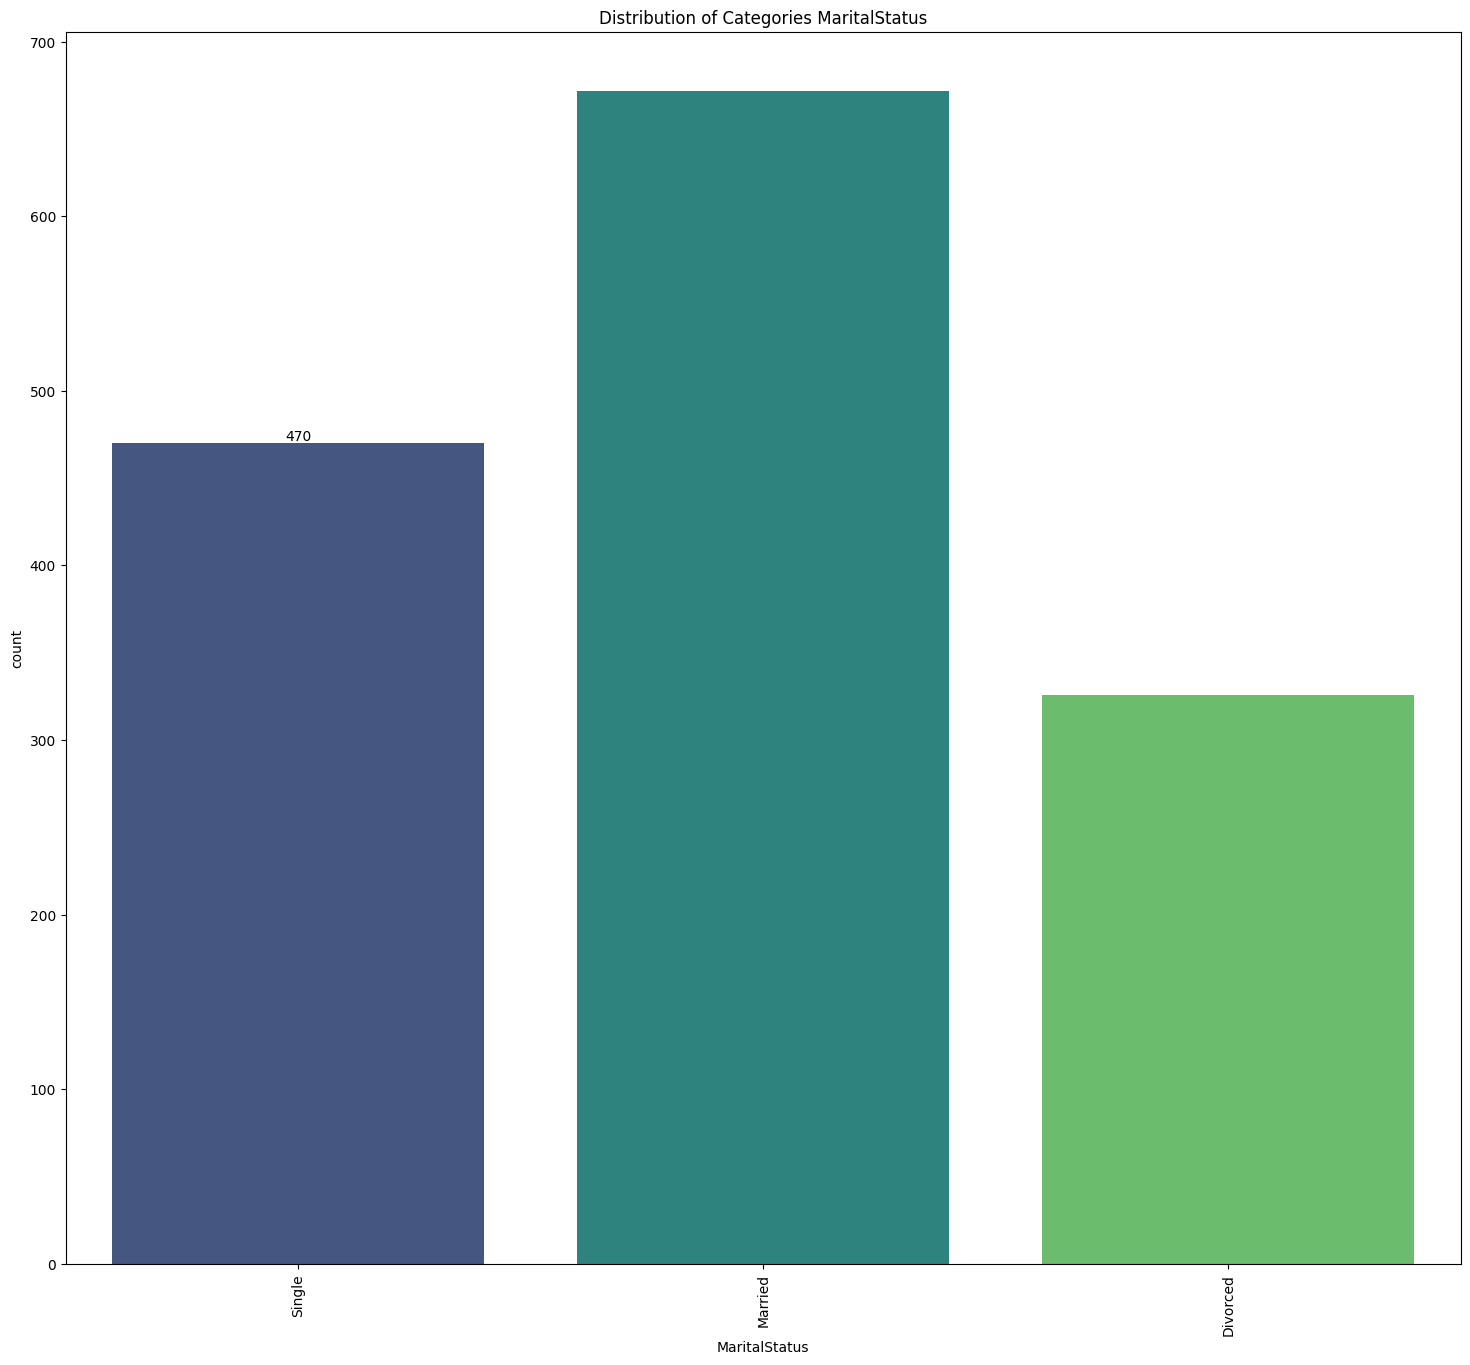

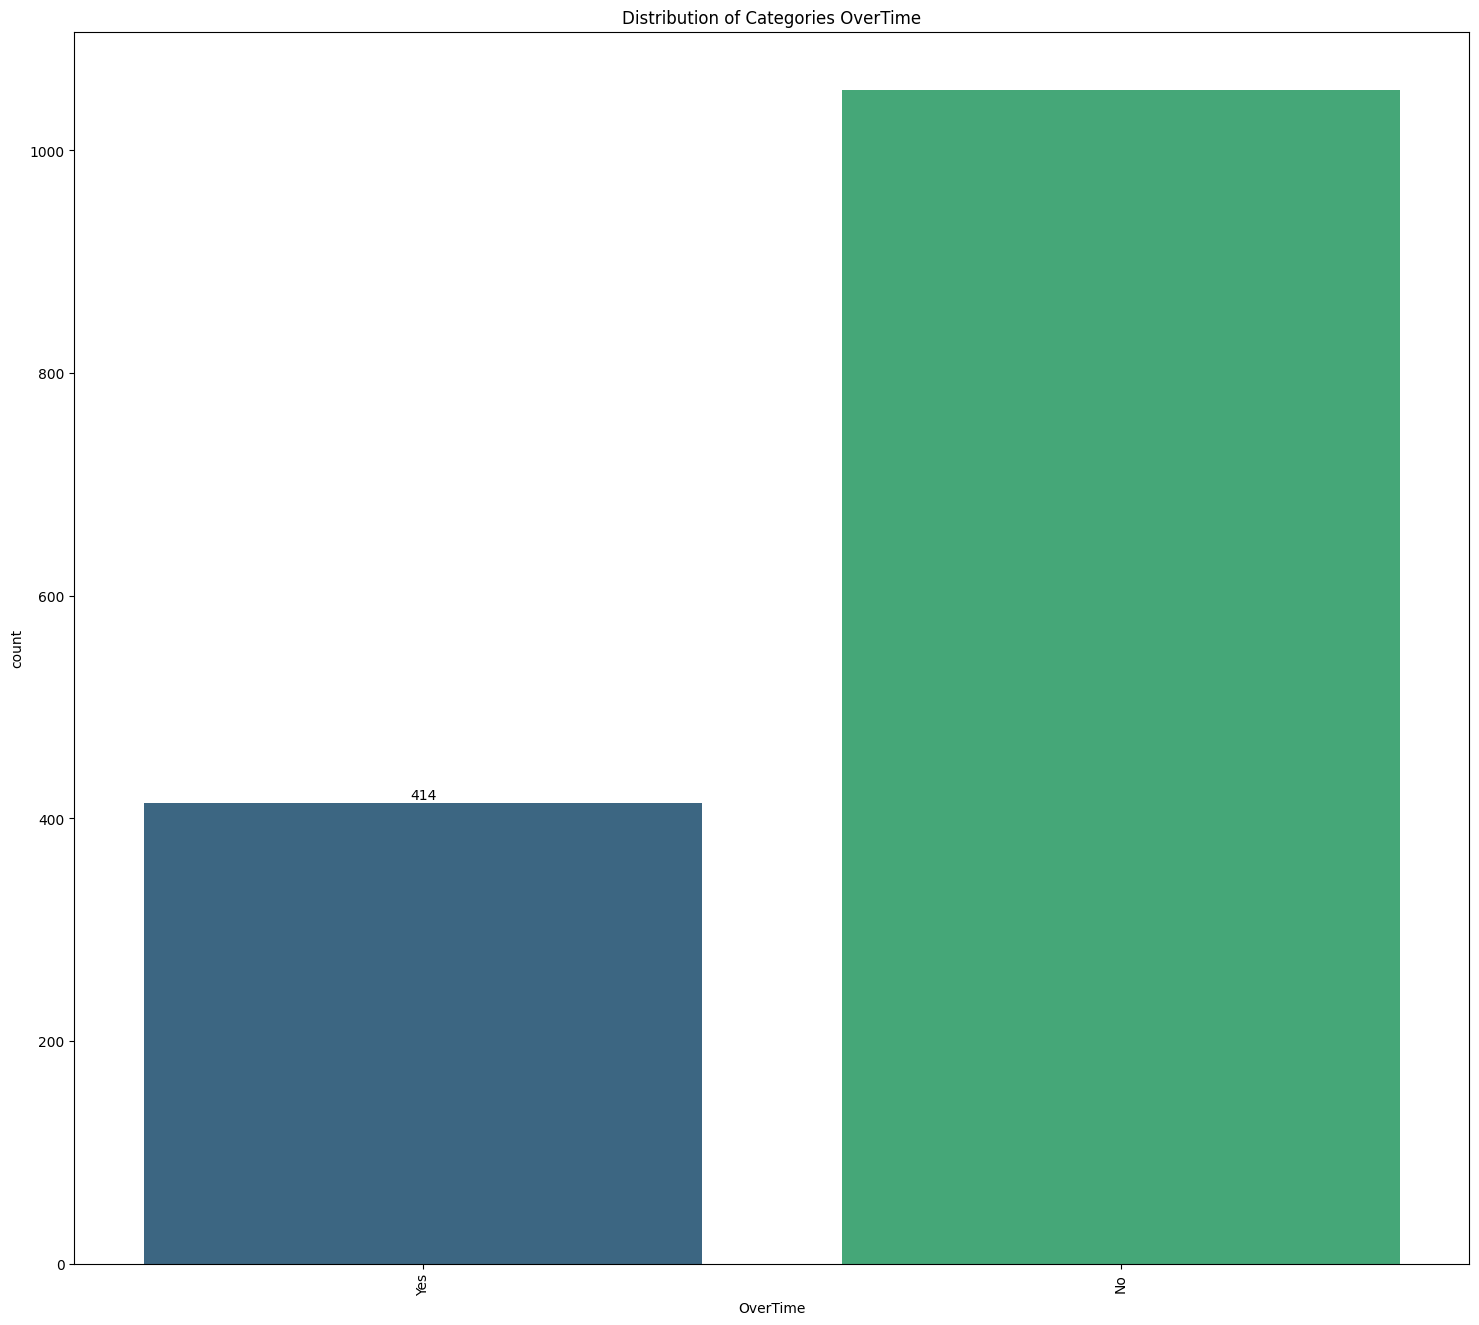

In [18]:
# Kategorik feature ların dağılımını göstermek için;
categor = df.select_dtypes("object").columns 

for column in categor:
    plt.figure(figsize=(18, 16))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])
    
    plt.xticks(rotation=90)
    plt.show()

In [19]:
df["Attrition"].value_counts(normalize = True)

Attrition
No    0.838556
Yes   0.161444
Name: proportion, dtype: float64

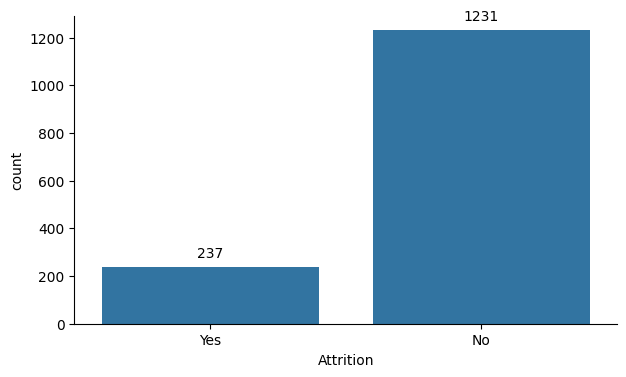

In [20]:
ax = sns.countplot(x=df["Attrition"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [21]:
df = df[[col for col in df.columns if col != 'MonthlyIncome'] + ['MonthlyIncome']]

In [22]:
#df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

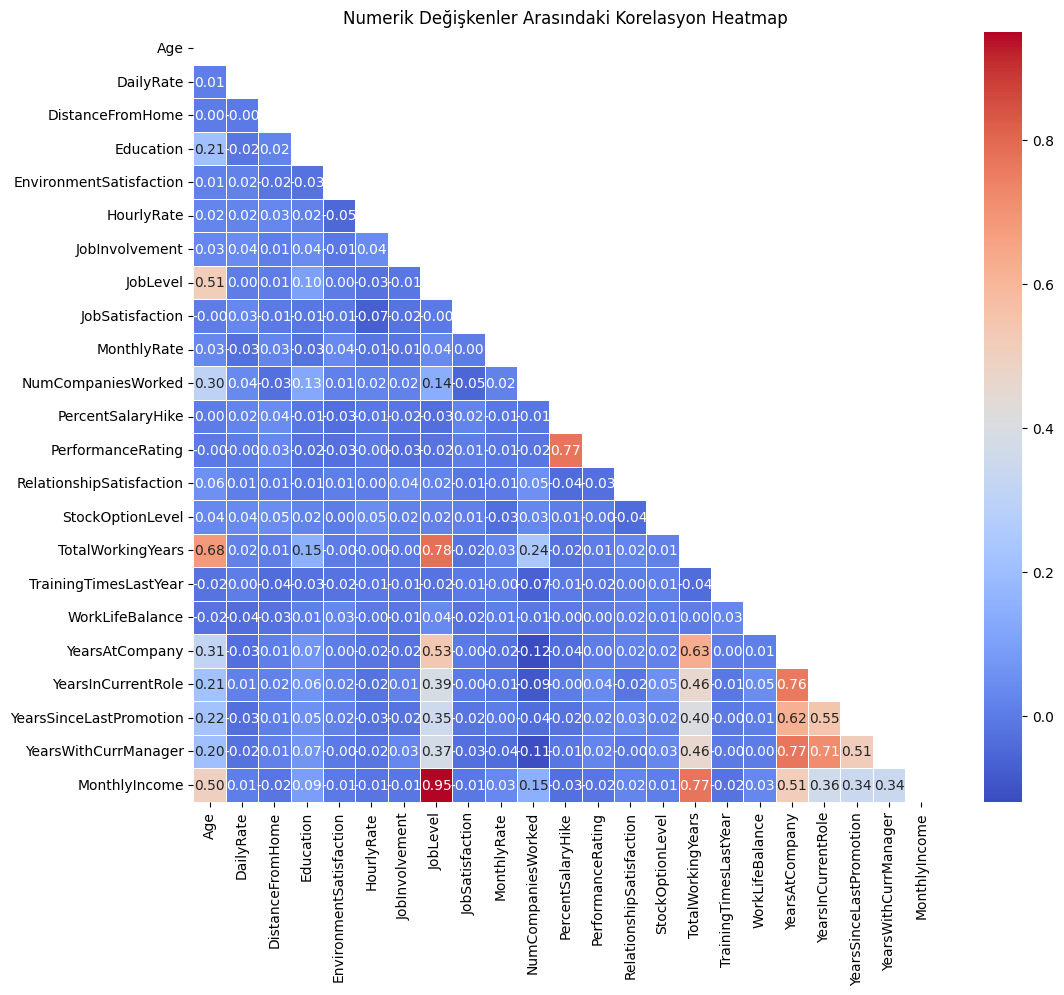

In [23]:
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesaplayın
corr_matrix = numerik_df.corr()

# Üst üçgeni maskeleyin
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap çizimi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Numerik Değişkenler Arasındaki Korelasyon Heatmap')
plt.show()

In [24]:
def dataframe_summary(df, columns):  
    
    print("\n",{'-'*80},"\n")
    # Eksik değerleri göster
    print("Eksik Değerler:","\n")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values)
    
    print("\n",{'-'*80},"\n")
    
    print("Toplam Duplicated sütun sayıları :","\n")
    duplicated = df.duplicated().sum()
    print(duplicated)
    
    print("\n",{'-'*80},"\n")
    
    # Sütunların istatistiksel özetini göster
    print("Sütunların İstatistiksel Özeti:")
    print(df.describe().T)
    print("\n",{'-'*80},"\n")


    print("Sütun isimleri:")
    print(df.columns)
    print("\n",{'-'*80},"\n")    
    
    """Prints unique values and their counts for specific columns in the DataFrame."""
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*50}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
        
cat_features = df.select_dtypes(include='object').columns
    
dataframe_summary(df,cat_features)




 {'--------------------------------------------------------------------------------'} 

Eksik Değerler: 

Series([], dtype: int64)

 {'--------------------------------------------------------------------------------'} 

Toplam Duplicated sütun sayıları : 

0

 {'--------------------------------------------------------------------------------'} 

Sütunların İstatistiksel Özeti:
                               count         mean         std         min  \
Age                      1468.000000    36.918937    9.115085   18.000000   
DailyRate                1468.000000   801.912125  403.467244  102.000000   
DistanceFromHome         1468.000000     9.192098    8.108830    1.000000   
Education                1468.000000     2.913488    1.024583    1.000000   
EnvironmentSatisfaction  1468.000000     2.720708    1.093293    1.000000   
HourlyRate               1468.000000    65.860354   20.324236   30.000000   
JobInvolvement           1468.000000     2.728202    0.710498    1.000000   
Job

In [25]:
def dataframe_summary(df, columns):  
    
    print("\n",{'-'*80},"\n")
    # Eksik değerleri göster
    print("Eksik Değerler:","\n")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values)
    
    print("\n",{'-'*80},"\n")
    
    print("Toplam Duplicated sütun sayıları :","\n")
    duplicated = df.duplicated().sum()
    print(duplicated)
    
    print("\n",{'-'*80},"\n")
    
    # Sütunların istatistiksel özetini göster
    print("Sütunların İstatistiksel Özeti:")
    print(df.describe().T)
    print("\n",{'-'*80},"\n")


    print("Sütun isimleri:")
    print(df.columns)
    print("\n",{'-'*80},"\n")    
    
    """Prints unique values and their counts for specific columns in the DataFrame."""
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*50}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
        
cat_features = df.select_dtypes(include='object').columns
    
dataframe_summary(df,cat_features)




 {'--------------------------------------------------------------------------------'} 

Eksik Değerler: 

Series([], dtype: int64)

 {'--------------------------------------------------------------------------------'} 

Toplam Duplicated sütun sayıları : 

0

 {'--------------------------------------------------------------------------------'} 

Sütunların İstatistiksel Özeti:
                               count         mean         std         min  \
Age                      1468.000000    36.918937    9.115085   18.000000   
DailyRate                1468.000000   801.912125  403.467244  102.000000   
DistanceFromHome         1468.000000     9.192098    8.108830    1.000000   
Education                1468.000000     2.913488    1.024583    1.000000   
EnvironmentSatisfaction  1468.000000     2.720708    1.093293    1.000000   
HourlyRate               1468.000000    65.860354   20.324236   30.000000   
JobInvolvement           1468.000000     2.728202    0.710498    1.000000   
Job

In [26]:
df["MonthlyIncome"].value_counts()

MonthlyIncome
2342.000000     4
6347.000000     3
2559.000000     3
3452.000000     3
2380.000000     3
               ..
6322.000000     1
7104.000000     1
2773.000000     1
19513.000000    1
4404.000000     1
Name: count, Length: 1345, dtype: int64

In [27]:
df.sample(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
725,35,Yes,Travel_Rarely,622,Research & Development,14,4,Other,3,Male,39,2,1,Laboratory Technician,2,Divorced,10074.000000,1,Yes,24.000000,4.000000,4,1,5,2,1,4,2,0,2,3743.000000


In [28]:
df["MonthlyIncome"].nunique()

1345

## Train | Test Split And Scaling Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop("MonthlyIncome", axis=1) 
y = df["MonthlyIncome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [33]:
X_train_with_dummies = pd.get_dummies(X_train, columns=cat_features, drop_first=True)
X_test_with_dummies = pd.get_dummies(X_test, columns=cat_features, drop_first=True)

In [34]:
for i in X_train_with_dummies.select_dtypes(include=bool).columns:
    X_train_with_dummies[i] = X_train_with_dummies[i].astype(int)
for i in X_test_with_dummies.select_dtypes(include=bool).columns:
    X_test_with_dummies[i] = X_test_with_dummies[i].astype(int)

In [35]:
X_test_with_dummies.dtypes

Age                                    int64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyRate                          float64
NumCompaniesWorked                     int64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
Attrition_

In [36]:
X_train_with_dummies.dtypes

Age                                    int64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyRate                          float64
NumCompaniesWorked                     int64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
Attrition_

## Linear_Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear_model = LinearRegression()

In [39]:
linear_model.fit(X_train_with_dummies, y_train)

LinearRegression()

In [40]:
y_pred_train = linear_model.predict(X_train_with_dummies)
my_dict_train = {"actual_train":y_pred_train}
result_linear = pd.DataFrame(my_dict_train)
result_linear.sample(10)

,actual_train
508,12466.351222
194,5924.436637
578,2448.111668
88,2172.238060
906,3275.080888
89,2466.140636
1128,2469.628195
1112,5799.147546
177,2756.004764
51,15968.261290


In [41]:
y_pred = linear_model.predict(X_test_with_dummies)

my_dict_test = {"actual_test": y_test}
result_linear = pd.DataFrame(my_dict_test)
result_linear.sample(10)


,actual_test
1112,4855.000000
61,2406.000000
943,3423.000000
1207,3537.000000
524,8621.000000
843,4420.000000
1288,5762.000000
671,2008.000000
425,17046.000000
65,14756.000000


In [42]:
result_linear["pred"] = y_pred
result_linear.sample(10)

,actual_test,pred
927,5410.000000,6373.094935
1355,5507.000000,6221.916189
365,5258.000000,5761.185426
1114,2367.000000,2772.836759
45,19545.000000,19261.720382
1159,5042.000000,6098.770424
125,2368.000000,2756.883830
1373,2133.000000,6048.201090
1441,6306.000000,5639.134052
814,19626.000000,18746.295899


In [43]:
# Error metricleri hesaplayan ve yazan kod blogu

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [44]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9495002505381015
MAE 		: 837.8937054295291
MSE 		: 1244984.403180772
RMSE 		: 1115.7886910973655


In [45]:
eval_metric(y_train, y_pred_train)

Model testing performance: 
---------------------------
R2_score 	: 0.9423134268161559
MAE 		: 854.9106256482108
MSE 		: 1240363.5769998813
RMSE 		: 1113.716111493356


## CV Linear Regression

In [46]:
from sklearn.model_selection import cross_validate, GridSearchCV

In [47]:
pd.DataFrame(cross_validate(LinearRegression(), X_train_with_dummies, y_train,
               scoring=["neg_root_mean_squared_error",
                        "neg_mean_squared_error",
                        "neg_mean_absolute_error",
                        "r2"],
               cv=10,
               return_train_score=True)).iloc[:,2:].mean()

test_neg_root_mean_squared_error       -1154.930746
train_neg_root_mean_squared_error      -1111.179018
test_neg_mean_squared_error         -1347032.547619
train_neg_mean_squared_error        -1234890.782018
test_neg_mean_absolute_error            -892.641864
train_neg_mean_absolute_error           -853.131170
test_r2                                    0.935278
train_r2                                   0.942547
dtype: float64

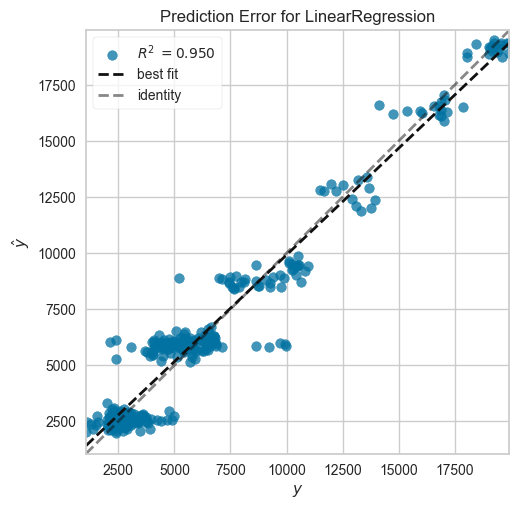

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_with_dummies, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_with_dummies, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Ridge


In [49]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [50]:
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [51]:
ridge_model.fit(X_train_with_dummies, y_train)

Ridge(random_state=42)

In [52]:
y_pred = ridge_model.predict(X_test_with_dummies)
y_train_pred = ridge_model.predict(X_train_with_dummies)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [54]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

,ridge_train,ridge_test
R2,0.942259,0.949496
mae,855.425257,836.857198
mse,1241531.069397,1245079.686389
rmse,1114.240131,1115.831388


## CV RİDGE 

In [55]:
model = Ridge(alpha=1.0, random_state = 42)
pd.DataFrame(cross_validate(model, X_train_with_dummies, y_train,
                        scoring =['r2',
                                  'neg_mean_absolute_error',
                                  'neg_mean_squared_error',
                                  'neg_root_mean_squared_error',], 
                        cv = 10,
                        return_train_score=True)).iloc[:,2:].mean()

test_r2                                    0.935288
train_r2                                   0.942480
test_neg_mean_absolute_error            -892.466253
train_neg_mean_absolute_error           -853.684299
test_neg_mean_squared_error         -1346213.380251
train_neg_mean_squared_error        -1236336.825132
test_neg_root_mean_squared_error       -1154.290442
train_neg_root_mean_squared_error      -1111.829462
dtype: float64

In [61]:
ridge_score
linear_model_score

,ridge_train,ridge_test
R2,0.942259,0.949496
mae,855.425257,836.857198
mse,1241531.069397,1245079.686389
rmse,1114.240131,1115.831388
